In [1]:
from IPython.display import Image

# Outline

1. [Linear regression](#one)
2. [Gradient descent](#two)
3. [Hands on](#three)
4. [Multiple features](#four)
5. [Normal Equation](#five)
6. [Regularization](#six)
7. [Polynomial regression](#seven)

<a id="one"></a>

# Linear Regression: motivation

Regression: uses training values for the target function to induce a hypothesized definition that fits these examples and, hopefully, *generalizes to unseen examples*.

In statistics, learning to approximate a continuous function is called regression.
Attempts to minimize some measure of *error* or *loss function* or *cost function*.

Problem: estimate the final mark of an exam given the number of hourse spent in studying by students.
Notation:
- *m* is the number of *training examples* (students)
- *x* are the input *variables* or *features* (the hours spent)
- *y* are the *output* or target variable
- *h* is the *hypothesis*

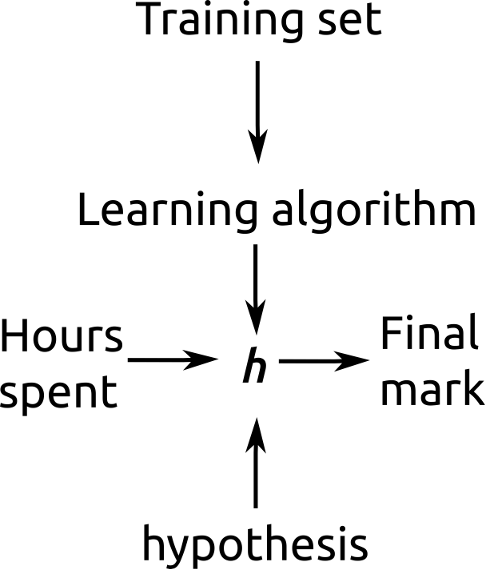

In [2]:
Image(filename="arrow.png")

### Linear regression with one variable

How do we represent *h*?  
Occam's razor: *h* is a linear function

$$h_\theta(x) = h(x) = \theta_0 + \theta_1 x $$

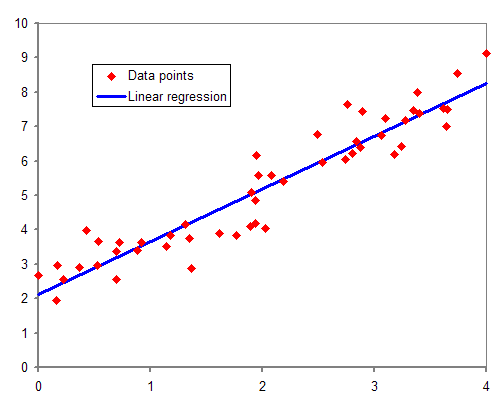

In [3]:
Image(filename="regr1.png")

$\theta_i$ is the parameter set; how to determine it's values?

choose them so that $h_\theta(x)$ values are close to the known $(x,y)$ pairs i. e. minimise their distance:

$$ J(\theta_0,\theta_1) = \frac{1}{2 m}\sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})^ 2 $$

$J$ is called the **cost function** or **merit function** or **loss function**

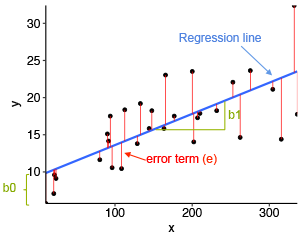

In [4]:
Image(filename="regr2.png")

<a id="two"></a>

# Gradient descent

Hence, for each pair of $(x,y)$ we can calculate $J$. The problem then is to minimise $J$ as a function of $\theta$

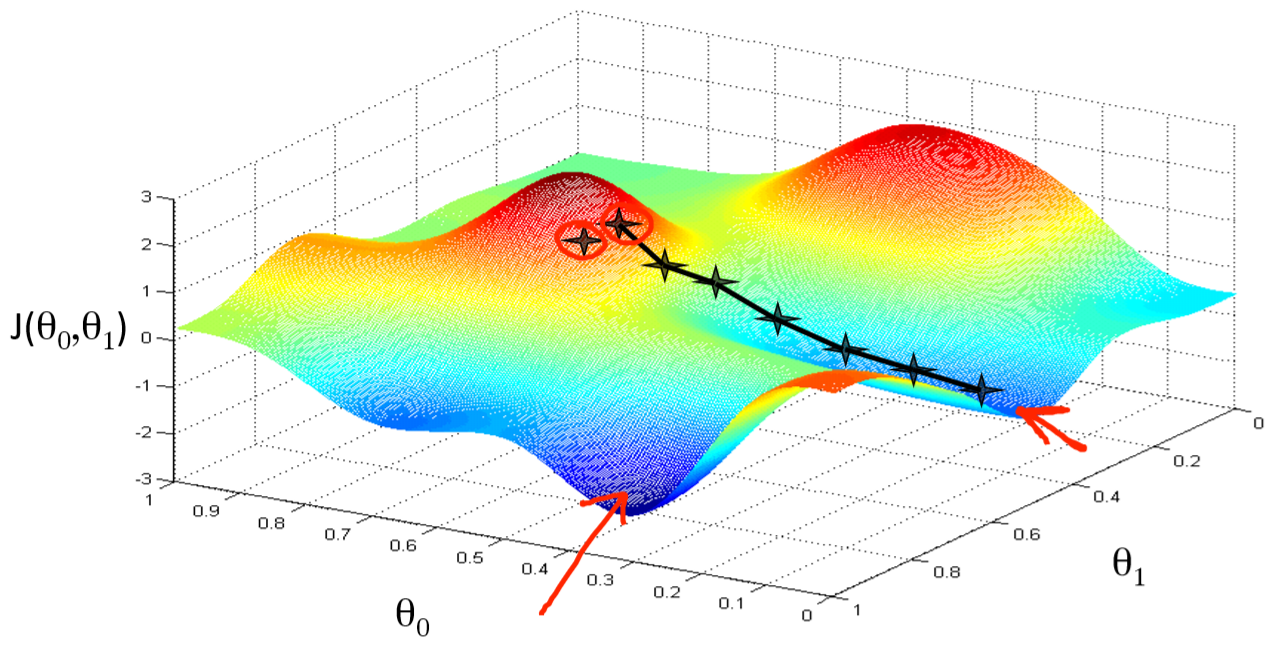

In [5]:
Image(filename="regr3.png")

and to minimise a function we use it's gradient:

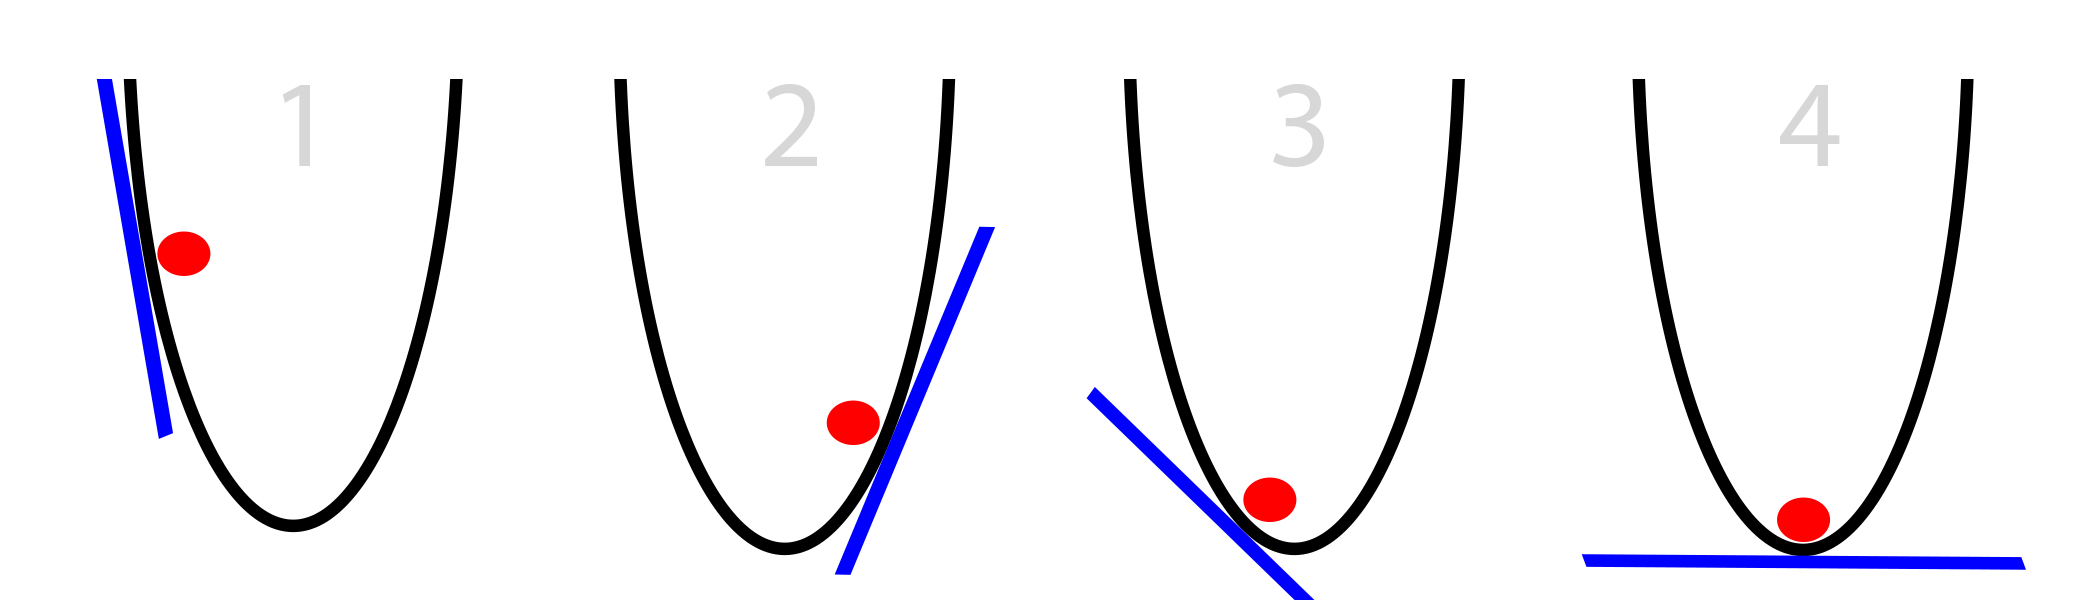

In [6]:
Image(filename="regr4.png")

$$ 
J(\theta_0,\theta_1) = \frac{1}{2 m}\sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})^ 2 = \frac{1}{2 m}\sum_{i=1}^m (\theta_0+\theta_1 x^{(i)}) - y^{(i)})^ 2\\
grad(h) = \nabla h = \binom{\partial \theta_0}{\partial \theta_1} \\
\frac{\partial}{\partial \theta_0} J = \frac{1}{m} \sum_{i=1}^m (h_\theta(x^{(i)}-y^{(i)}) \\
\frac{\partial}{\partial \theta_1} J = \frac{1}{m} \sum_{i=1}^m x (h_\theta(x^{(i)}-y^{(i)})
$$

the plot above hints at how to get the optimal values of $\theta$:  
- given some initial guess of $\theta_0$ and $\theta_1$ 
- we can calculate $J$ and derivatives
- go in the direction of the *negative gradient* in the parameter space
- get new values for $\theta_0$ and $\theta_1$
- repeat until we have done a maximum number of steps or J does not change anymore

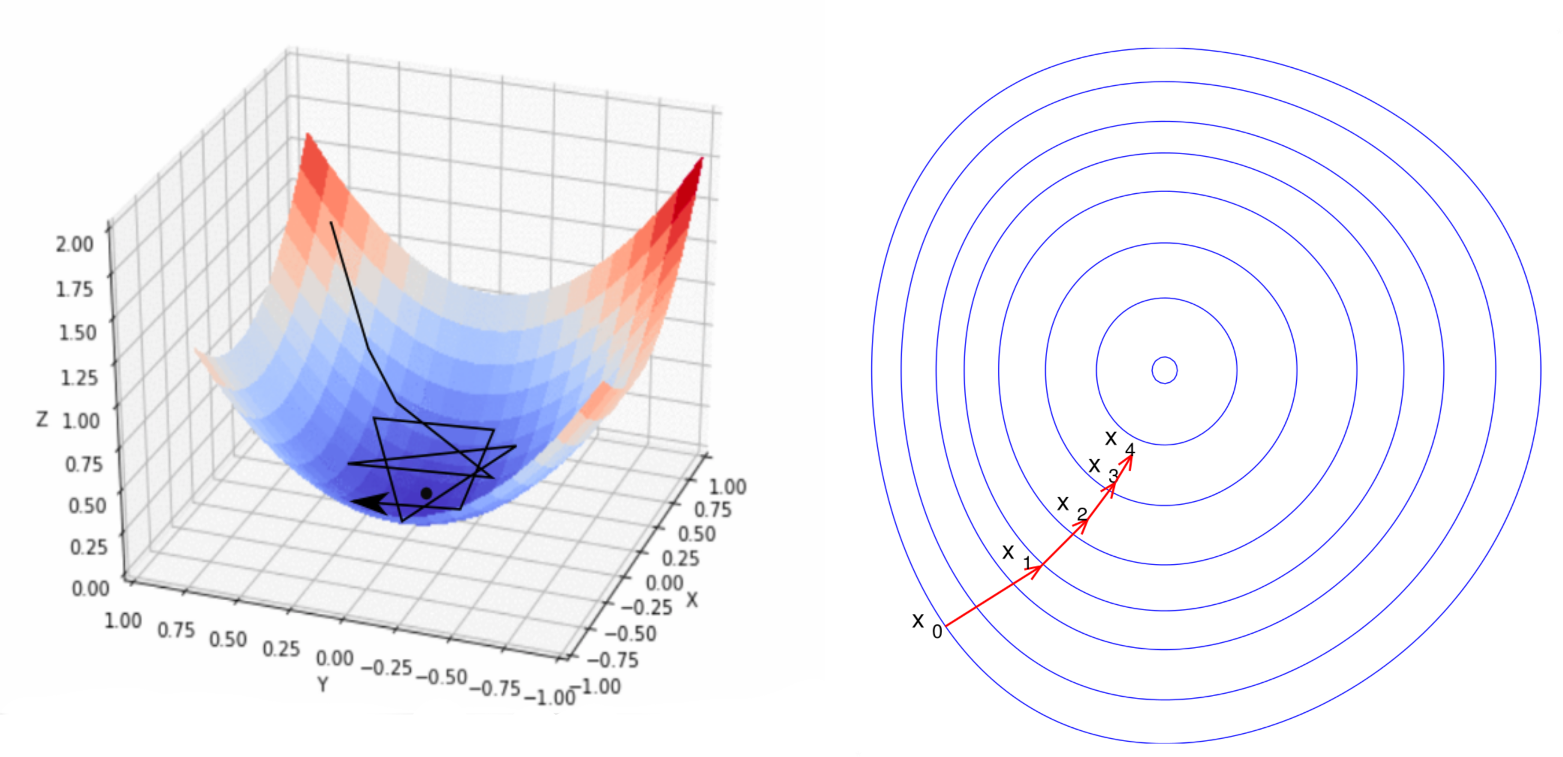

In [7]:
Image("regr5.png")

Formally:  

$$ \theta_j^{(n+1)} = \theta_j^n - \alpha \frac{\partial}{\partial \theta_j} J $$  

where $\alpha$ is the **learning rate** and bounds the displacement of the parameters at any one step

If $\alpha$ is too	small, gradient descent can	be	slow.

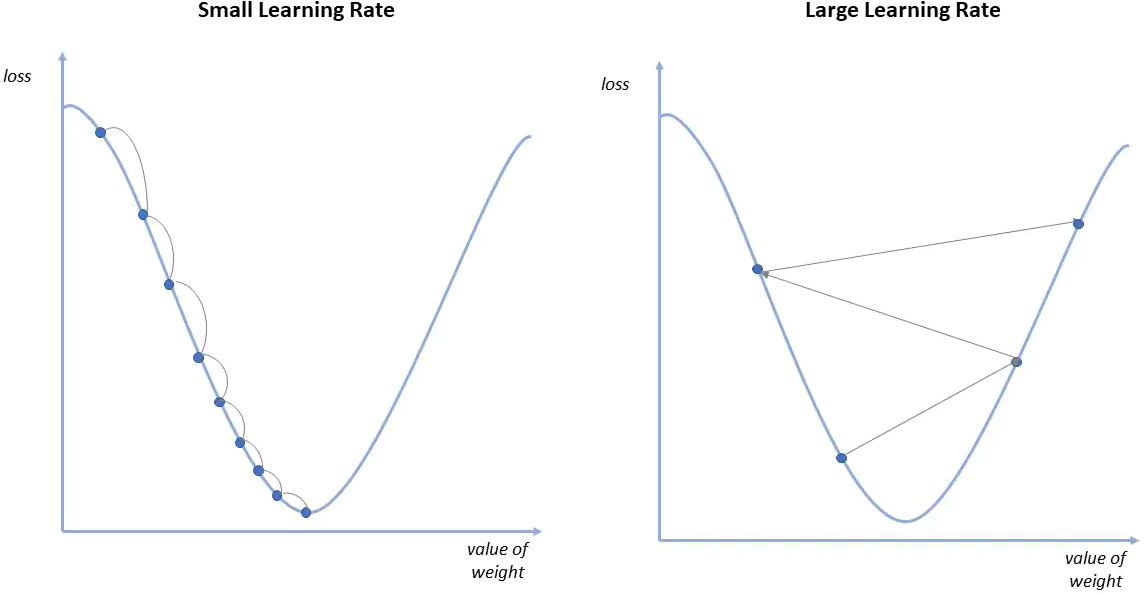

In [8]:
Image("regr6.png")

The learning rate $\alpha$ can be updated during the optimization but, since the gradient descent will take smaller steps as it approaches a local minimum, even the basic version with a fixed value of it can approach to a local minimum.

The actual algorithm for our model is:
- $$ \theta_0^{(n+1)} = \theta_0^n - \alpha \frac{\partial J}{\partial \theta_0} = \theta_0^n - \alpha \sum_{i=1}^m (h_\theta(x^{(i)})-y^{(i)}) $$  
- $$ \theta_1^{(n+1)} = \theta_1^n - \alpha \frac{\partial J}{\partial \theta_1} = \theta_1^n - \alpha \sum_{i=1}^m x^{(i)} (h_\theta(x^{(i)})-y^{(i)}) $$

#### batch gradient descent

In this formulation, all data points are used at each iteration of the gradient descent.One iteration of the algorithm is called one batch and this form of gradient descent is referred to as batch gradient descent.

<a id="three"></a>

# Hands on

Let's see how to convert idea into actual code

first thing first: we need an actual dataset and tools to load and look into it

In [9]:
# get some python modules
import numpy as np #array manipulation and basic math
import scipy.stats as stats #stat functions
import matplotlib.pyplot as plt #make plotsand figures

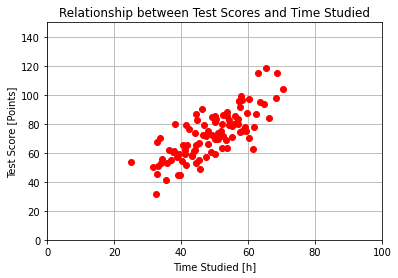

In [10]:
# Load data
data = np.loadtxt("data.csv", delimiter=",") # a comma separated values table (you can create it from excel)

# Display the data using matplotlib
fig, ax = plt.subplots()  # creates a figure and an axes object
ax.plot(data[:,0], data[:,1], 'ro')
ax.axis([0, 100, 0, 150]) # set the limits of the axis
ax.set(xlabel='Time Studied [h]', ylabel='Test Score [Points]',
       title='Relationship between Test Scores and Time Studied')
ax.grid() # show the grid
plt.show()

Get some descriptive statistics:

In [11]:
stats.describe(data)

DescribeResult(nobs=100, minmax=(array([25.12848465, 31.70700585]), array([ 70.34607562, 118.5912173 ])), mean=array([48.95834146, 72.73505055]), variance=array([ 94.99190951, 277.49520751]), skewness=array([-0.01778592,  0.29285457]), kurtosis=array([-0.62997621,  0.05441057]))

Now, let's define the functions that we need to develop our model:
- a function that estimates the derivatives
- a function that runs the gradient descent
- a function that calculates the cost function
- a function that "puts together all the pieces"

In [12]:
def gradient(theta, alpha, data):
    """
    Calculates gradient wrt parameters
    Takes as arguments:
    - values of parameters at previous step
    - learning rate alpha
    - table (array) with all points
    Returns:
    - new values of parameters
    """
    # number of observations
    m = len(data)
    # derivative wrt parameters
    dev_theta = [0.,0.]
    for i in range(0, m):
        h = theta[1] * data[i, 0] + theta[0] - data[i, 1]
        dev_theta[0] += (1/m) * h
        dev_theta[1] += (1/m) * data[i, 0] * h
    theta[0] = theta[0] - (alpha * dev_theta[0]) 
    theta[1] = theta[1] - (alpha * dev_theta[1])
    return theta

In [13]:
help(gradient)

Help on function gradient in module __main__:

gradient(theta, alpha, data)
    Calculates gradient wrt parameters
    Takes as arguments:
    - values of parameters at previous step
    - learning rate alpha
    - table (array) with all points
    Returns:
    - new values of parameters



In [14]:
def cost_function(theta, data):
    """
    Calculates J.
    Takes:
    - parameters
    - data points
    """
    J = 0.
    m = len(data)
    for i in range(0,m):
        J += (theta[1] * data[i, 0] + theta[0] -data[i, 1]) ** 2
    return J / (2.* m)

In [15]:
def batch_gradient_descent(theta, alpha, niter, data, verbose=500):
    """
    Runs the minimization, calling cost_function and gradient.
    Takes:
    - data
    - learning rate
    - max. number of iterations
    Returns:
    - final theta 
    - number of iterations done
    - final cost
    """
    theta = [0.,0.]
    J =  cost_function(theta,data)
    for i in range(niter):
        theta = gradient(theta, alpha, data)
        J_new = cost_function(theta, data)
        if J_new <= J:
            if i % verbose == 0:
                print("Iteration {0}: theta_0 = {1:f}, theta_1 = {2:f}, J = {3:f}".\
                      format(i, theta[0], theta[1], J_new))
        else:
            #raise ValueError("J is increasing J={0:f}, J_new={1:f}".format(J, J_new))
            print("J is increasing J={0:f}, J_new={1:f}".format(J, J_new))
            break
    return theta, i, J

In [16]:
def train_model(alpha, niter, theta, data):
    """
    - Set (hyper)parameters
    - Load data
    - Perform minimization
    """ 
    
    # gradient descent algorithm
    J = cost_function(theta, data)
    print("Initial conditions. theta_0={0:f}, theta_1={1:f}, J={2:f}".format(theta[0], theta[1], J))
    print("Running...")
    theta, i, J = batch_gradient_descent(theta, alpha, niter, data)

    return theta

Let's run it

In [17]:
data = np.loadtxt("data.csv", delimiter=",")
model = train_model(5e-4, 1000, [3., -1.], data)
model

Initial conditions. theta_0=3.000000, theta_1=-1.000000, J=7352.805823
Running...
Iteration 0: theta_0 = 0.036368, theta_1 = 1.842676, J = 221.254403
Iteration 500: theta_0 = 0.103982, theta_1 = 1.477448, J = 56.302921


[0.17789750918199201, 1.4759955840512196]

What if we try to double the learning rate

In [18]:
train_model(1e-3, 1000, [3., -1.], data)

Initial conditions. theta_0=3.000000, theta_1=-1.000000, J=7352.805823
Running...
J is increasing J=2782.553917, J_new=6124.461829


[0.07273505055368648, 3.685351486795526]

## Exercise 1

Warm up exercise: show/demonstrate the quality of the model

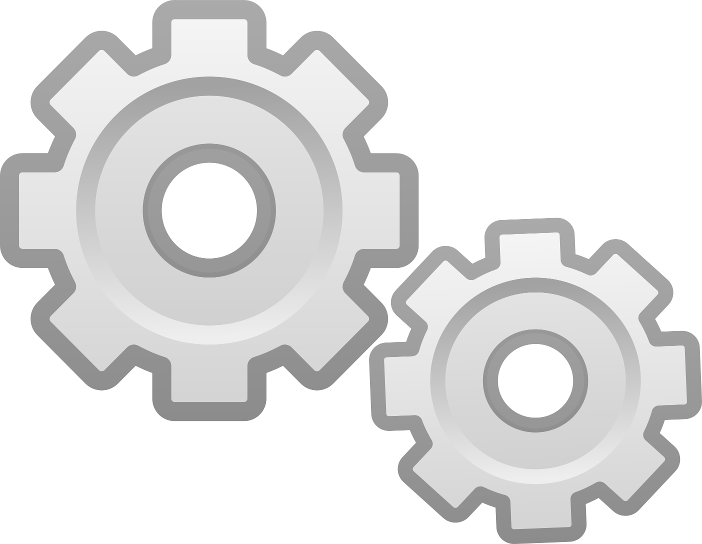

In [19]:
Image(filename="gears.png")

Hint: a figure is worth a thousand words

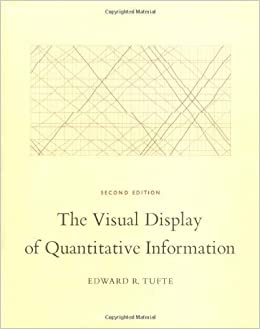

In [20]:
Image(filename="tufte.jpg")

### Solution

Just plot the model against the data

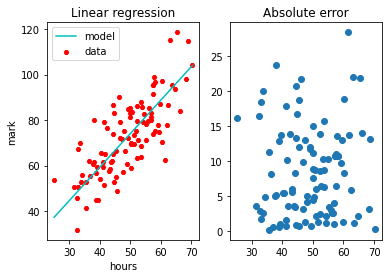

In [21]:
plt.subplot(121)
plt.title("Linear regression")
plt.scatter(data[:,0], data[:,1], marker='H', c='r', s=20, label='data')
plt.plot(np.linspace(np.min(data[:,0]),np.max(data[:,0])), \
         model[0]+model[1]*np.linspace(np.min(data[:,0]),np.max(data[:,0])), ls="-", c='c', label='model')
plt.legend()
plt.xlabel("hours")
plt.ylabel("mark")

plt.subplot(122)
plt.title("Absolute error")
error = np.abs(data[:,1]-(model[0]+model[1]*data[:,0]))
plt.scatter(data[:,0],error)

<a id="four"></a>

# Multiple features

what if we have multiple data to use for our model?  
Example: determine house princing from basic features such as size, number of rooms, etc etc

Micro-excursus: **Pandas** is a python library very used in data science that does a lot of handy manipulation for named tables.  
But it's not very performant

In [22]:
import pandas as pd

In [23]:
house_data = pd.read_csv('house_rental_data.csv.txt', index_col='Unnamed: 0')

In [24]:
house_data.rename(columns={'Living.Room':'Livingroom'}, inplace=True)
house_data.head()

,Sqft,Floor,TotalFloor,Bedroom,Livingroom,Bathroom,Price
1,1177.698,2,7,2,2,2,62000
2,2134.800,5,7,4,2,2,78000
3,1138.560,5,7,2,2,1,58000
4,1458.780,2,7,3,2,2,45000
5,967.776,11,14,3,2,2,45000


Let's extract features and target data

In [25]:
features = house_data[['Sqft','Floor','TotalFloor','Bedroom','Livingroom','Bathroom']].values
features.shape

(645, 6)

In [26]:
target_data = house_data.Price.values
target_data.shape

(645,)

### Multivariate regression representation

- $n$ number of features
- $x^{(i)}$ feature**s** of the $i_{th}$ example
- $x_j^{(i)}$ value of the $j_{th}$ feature of the $i_{th}$ example
- $X^{m \times n}$ is a matrix of input data
- $\theta^{n \times 1}$ is a column vector of parameters
- $y^{m \times 1}$  is a column vector of dependent variables

New hypothesis:
$$
h_\theta(x) = \theta_0 x_0 + \theta_1 x_1 + \theta_2 x_2 \ldots + \theta_n x_n \\
x_0 = {1} 
$$

Hypothesis:
$$ h_\theta(x) = X \theta^{m \times 1} $$
Parameters:	
$$\theta \in R^n$$  
Cost function: 	$$J(\theta) = \frac{1}{2 m}\sum_{i=1}^m (h_\theta(x^i) - y^i)^2 $$

Gradient descent:  
Repeat (  
    $$ \theta_j^{n+1} = \theta_j^n - \frac{1}{m} \frac{\partial }{\partial \theta_j} J $$  
    simultaneously	update	for every $j \in [0,n]$)  

$$ \frac{\partial J}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^m x_j (h_\theta(x)^i - y^i) $$

## Feature scaling

Idea: make sure features are on a similar scale.  
E. g. make every feature to have 0 mean and unit variance (mean normalization)

**From scikit learn documentation**  
Feature scaling through standardization (or Z-score normalization) can be an important preprocessing step for many machine learning algorithms. Standardization involves rescaling the features such that they have the properties of a standard normal distribution with a mean of zero and a standard deviation of one.

While many algorithms (such as SVM, K-nearest neighbors, and logistic regression) require features to be normalized, intuitively we can think of Principle Component Analysis (PCA) as being a prime example of when normalization is important. In PCA we are interested in the components that maximize the variance. If one component (e.g. human height) varies less than another (e.g. weight) because of their respective scales (meters vs. kilos), PCA might determine that the direction of maximal variance more closely corresponds with the ‘weight’ axis, if those features are not scaled. As a change in height of one meter can be considered much more important than the change in weight of one kilogram, this is clearly incorrect

## Exercise 2

Implement a feature scaling function that transform features with mean 0 and variance 1

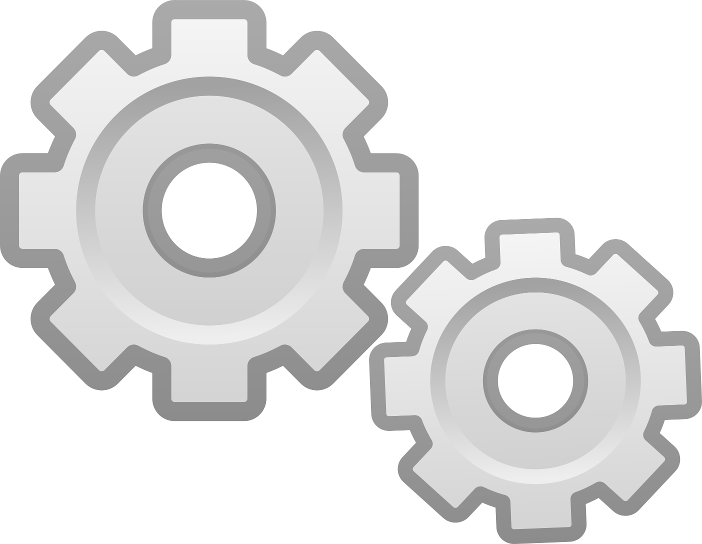

In [27]:
Image(filename="gears.png")

In [28]:
def feature_scale(data):
    data_scaled = np.empty(data.shape)
    for j in range(data.shape[1]):
        mean = np.mean(data[:,j])
        std  = np.std(data[:,j])
        data_scaled[:,j] = (data[:,j] - mean) / std
    return data_scaled

In [29]:
scaled_features = feature_scale(features)
scaled_target = (target_data - np.mean(target_data)) / np.std(target_data)
print(np.mean(scaled_features, axis=0), np.std(scaled_features, axis=0))

[ 4.37204106e-17  1.05697105e-17 -6.02446603e-18 -1.68426857e-16
  1.98463124e-16  9.19161388e-17] [1. 1. 1. 1. 1. 1.]


In [30]:
np.mean(scaled_target), np.var(scaled_target), scaled_features.shape

(-1.0465358123598375e-16, 1.0, (645, 6))

## Apply multivariate linear regression

In [31]:
# intercept
ones = np.ones((scaled_features.shape[0], 1))
X = np.append(ones, scaled_features, axis=1)
X.shape

(645, 7)

**Note**: the basic numpy data type, the `numpy.ndarray` does not perform matrix operation but operates in place;
use `numpy.matrix` to have R/Matlab like behaviour    

In [32]:
#parameters
theta = np.random.normal(size=7)/10.
theta = np.expand_dims(theta,axis=1)
theta = np.matrix(theta)
theta.shape

(7, 1)

In [33]:
# Initial hypothesis
X = np.matrix(X)
y = np.matrix(np.expand_dims(scaled_target, axis=0).T)
X.shape, y.shape

((645, 7), (645, 1))

In [34]:
# Number of training examples
m = scaled_features.shape[0]

# Initial cost 
hy = X*theta - y
J = 1./(2.*m) * np.dot(hy.T,hy)

Do the regression

In [35]:
alpha = 5e-4
niter = int(1e5)
n = 0
Jold = J

while J > 1e-4 and n < niter:
    if Jold > J or n==0:
        Jold = J
    elif Jold == J:
        print("no more gain at iter ", n)
        break
    else:
        print("Jold, J, n", Jold, J, n)
        raise ValueError("J is not diminishing")

    grad = 1./m * alpha * ((X*theta - y).T.dot(X))
    theta = theta - grad.T
    hy = X*theta - y
    J = 1./(2.*m) * np.dot(hy.T,hy)
    n += 1

theta,n,J

(matrix([[-1.33526392e-16],
         [ 8.15810540e-01],
         [ 1.11835461e-01],
         [ 1.89916491e-02],
         [-5.03723188e-02],
         [-4.37108717e-02],
         [ 5.32855186e-02]]),
 100000,
 matrix([[0.14924141]]))

<a id="five"></a>

# Normal equation

With a univariate linear regression problem we know how to solve analytically for $J^\prime = 0$.
This can be done for all $j$ features used to give a set of equations that can be put in matrix form.

$$ J(\theta) = \frac{1}{2m}(X\theta - y)^T(X\theta -y)   $$  
leaving aside the leading factor:

$$ 
J(\theta) = ((X\theta))^T -y^T)(X\theta-y)  \\
J(\theta) = (X\theta)^T (X\theta) -(X\theta)^T y - yT(X\theta)+y^Ty
$$

now $X\in R^{m\times n}$, $\theta\in R^{n\times 1}$ thus $(X\theta) \in R^{m\times 1}$ as is $y$; order of multiplication does not matter:

$$ J(\theta) = \theta^TX^TX\theta - 2 (X\theta)^Ty + y^Ty $$

and the derivative of $J$ with respect to parameters will be:

$$\frac{\partial J}{\partial \theta} = 2X^TX\theta -2X^Ty = 0$$

or assuming that $X^TX$ is invertible:

$$ \theta = (X^T X)^{-1} X^T Y$$

**Gradient Descent**
- Need to choose $\alpha$
- Needs many iteraions.
- Works well even when $n$ is large.	

**Normal equation**
- No need to choose	
- Don’t	need to	iterate.	
- Need	to	invert (large?) n-by-n matrices (if possible)

## Exercise 3

Implement the normal equation

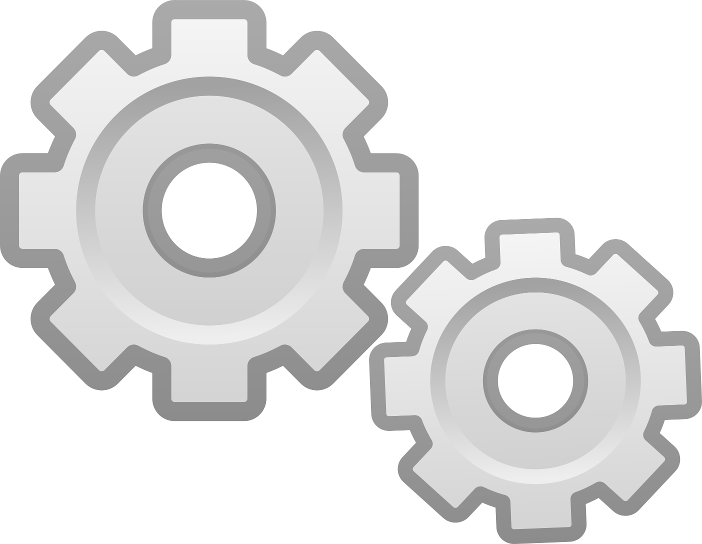

In [36]:
Image(filename="gears.png")

## Solution

It's just a one liner

In [37]:
def normal_eq(X, y):
    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T,), y)
    return theta

In [38]:
normal_eq(X,y)-theta

matrix([[ 3.42524012e-18],
        [ 2.05268505e-06],
        [ 4.77301349e-07],
        [-7.91908719e-07],
        [-1.85498717e-07],
        [ 3.67146333e-07],
        [-1.98124462e-06]])

<a id="six"></a>

# Shrinkage Methods

**Regularization** in statistics refers to a process of introducing additional information (i.e. put "artificial" constrains in the predictors) in order to solve an ill-posed problem and/or to prevent overfitting. 
In Shrinkage methods, putting additional contrainst on the sum of squares (**Ridge Regression**) or of absolute values (**Lasso**) *shrinks* them to finite values or towards zero. In neural networks this is known as *weight decay*.

### Ridge Regression

Also known as Tichonov regularization or $L^2$ regularization. The name *Ridge Regression* was proposed by Hoerl and Kennard (1970).
We are given a problem like $Xw=y$. Suppose the problem is ill posed (i.e. $w$ does not exist or is not unique or we have too many predictors or *columns*). To find a solution $w$ with the desired properties one can minimize instead  
  
$$\vert\vert Xw-y\vert\vert^2 - \vert\vert\Gamma w\vert\vert^2$$  
  
where $\Gamma$ is the *Tichonov matrix* or *regularization operator*; $\Gamma$ may be the identity or a filter operator (e.g. high pass) and can be scaled up or down with a scalar factor: $\Gamma=\lambda\Gamma$ where $\lambda=0$ gives the standard least squares. Using regularization, a numerical solution $\hat{w}$ may be found as: 

$$\hat{w} = (XX^T-\Gamma\Gamma^T)^{-1}X^Ty$$.  

#### RR and SVD

If $\Gamma = \lambda I$ it can be shown that, given *Singular Value Decomposition* (SVD) of $X$: $X = U\Sigma V^T$  
with singular values $\sigma_i$, $\hat{w}$ becomes: $\hat{w} = VDU^T y$  where $D$ is the diagonal matrix:  

$$D_{ii} = \frac {\sigma_i} {\sigma_i^2+\lambda^2}$$.  

#### Choice of regularization parameters

One, among many, approaches for determining $\lambda$ is the *leave-one-out cross validation* where the optimal value of alpha is the one that minimizes ($\tau$ = actual number of degrees of freedom):  
 
 $$ G = \frac{RSS} {\tau^2} = \frac{\vert\vert Xw-y\vert\vert^2} {[\mathbf{Tr}(I-X(X^TX-\lambda^2I)^{-1}X^T)]^2}$$ 

#### Evaluation of $\partial{Cost(w)}/\partial{w_j}$

The objective function for RR is: 
  
$$ Cost(w) = (\sum_{i=1}^n (y_i -  \sum_{j=0}^m X_{ij}w_j)^2) +\lambda \sum_{j=0}^m w_j^2 $$  
  
the derivative of the cost function wrt the predictor is:
  
$$ \frac{\partial Cost(w)}{\partial w_j} = -2\sum_{i=1} X_{ij}(y_i -\sum_{k=0}^m X_{ik} w_k)  + 2\lambda w_j $$

Applying this function in an update of the gradient, it can be shown that $w_j \propto\ 1-2\lambda\eta$ which prevents it to approach zero.

### Lasso Regression

i.e. *Least Absolute Shrinkage and Selection Operator* or $L^1$ regularization. At variance with in *Lasso*the regularization is done using the abosolute value of predictors:   

$$ Cost(w) = (\sum_{i=1} y_i -\sum_{k=0}X_{ik}w_k)^2 + \lambda\sum_{j=0} \vert w_j\vert $$   
this creates a discontinuity in the gradient at $w_j=0$. It can be shown that this equals that if a predictor $w_j$ has a linear behviour in a simple regression it will be zero in a region between $(-lambda/c,\lambda/c)$. In practical terms, Lasso performs a *feature selection* filtering out non-important predictors while RR keeps all predictos in the model.


### Lasso vs RR


- **Ridge**: It includes all (or none) of the features in the model. Thus, the major advantage of ridge regression is coefficient shrinkage and reducing model complexity. Useful to prevent **overfitting** and reduce complexity. *Correlation between features* will be distributed among predictors.
- **Lasso**: Along with shrinking coefficients, lasso performs feature selection as well. (Remember the ‘selection‘ in the lasso full-form?) As we observed earlier, some of the coefficients become exactly zero, which is equivalent to the particular feature being excluded from the model. Useful if searching sparse solutions with many (millions) of features (e.g. genetic data). *Correlation between features* will be attibuted to one predictor, filtering the others.

<a id="seven"></a>

# Polynomial regression

Suppose we have data like this:

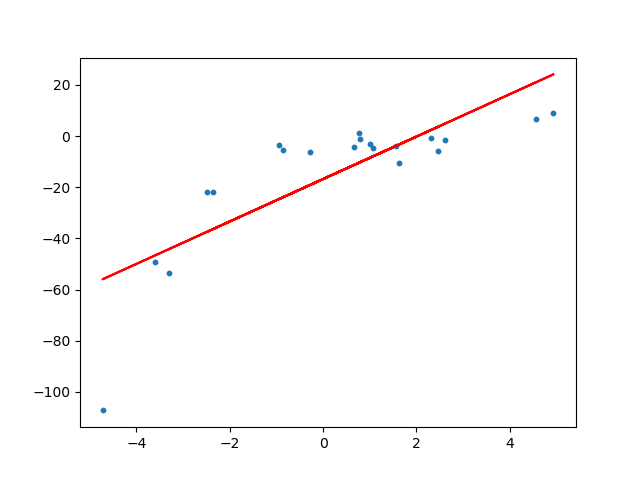

In [39]:
Image(filename="regr7.png")

Fitting with a linear model would be a case of **underfitting**.

Let's change the model with a new one:

$$ y = \theta_0 + \theta_1 x_1 + \theta_2 x_1^2 + \ldots + \theta_n x_1^n $$

Previously, we have dealt with the *learning rate* $\alpha$ and the *shrinkage factor* $\lambda$ which are examples of *hyperparameters*; the *degree* of the polynomial *n* is another such example.

Let's upload a new data set:

In [40]:
data = np.loadtxt("vdw_glob.dat")
data.shape

(94, 2)

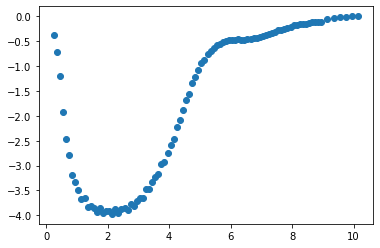

In [41]:
plt.scatter(data[:,0], data[:,1])

We now put odd index points in the *train* set and even index points in the *test* set

In [42]:
xtrain = data[::2,0]
ytrain = data[::2,1]
xtest  = data[1::2,0]
ytest  = data[1::2,1]

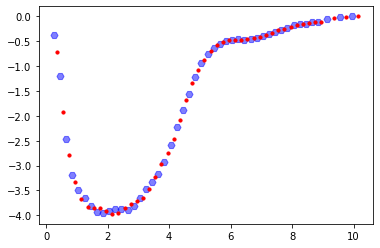

In [43]:
plt.scatter(xtrain, ytrain, c='b', s=50, alpha=0.5, marker='H')
plt.scatter(xtest, ytest, c='r', s=10)

We now implement a *Ridge Regression* polynomial model for this data using the SciKit Learn library. First of all we generate input data for powers other than 1

In [44]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

In [45]:
x_ = PolynomialFeatures(degree=3, include_bias=False).fit_transform(xtrain.reshape(-1, 1))
x__ = PolynomialFeatures(degree=3, include_bias=False).fit_transform(xtrain.reshape(-1, 1))

and now we can create an **instance** of the Ridge **class** to be used as model.  
Warning: **alpha** here is the **shrinking factor** not the learning rate.

In [46]:
shrink = 0.1

In [47]:
model = Ridge(alpha=shrink, fit_intercept=True,solver='svd')
model.fit(x_, ytrain)
model.coef_, model.intercept_

(array([-2.15866109,  0.60809717, -0.03904159]), -1.3444953711538155)

## Quality assessment

To evaluate the quality of a fit we use the **Root Mean Square Error** (RMSE) and the **R2** score.

In [48]:
from sklearn.metrics import mean_squared_error,r2_score

the **R2** score or, **coefficent of determination** is defined as:

$$ R^2 = 1 - \frac{RSS}{TSS} $$

where the **Total sum of squares** (TSS) is $\sum_i^n (y_i -\bar{y})^2$ and the **Residual** sum of squares (RSS) is $\sum_i^n (y_i -\hat{y}_i)^2$

the best **R2** is 1 and it can be as worse as you want, while RMSE should go to zero.

We can now evaluate our model:

In [49]:
y_1 = model.predict(x_)
y_2 = model.predict(x__)

Text(0, 0.5, 'Energy (kJ/mol)')

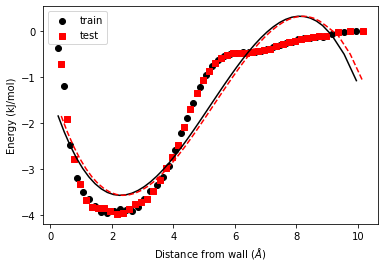

In [50]:
plt.scatter(xtrain,ytrain,marker="o",color='k',label='train')
plt.plot(xtrain,y_1,linestyle="-",color='k')
plt.scatter(xtest,ytest,marker="s",color='r',label='test')
plt.plot(xtest,y_1,linestyle="--",color='r')
plt.legend()
plt.xlabel("Distance from wall ($\AA$)")
plt.ylabel("Energy (kJ/mol)")

In [51]:
rmse_train = np.sqrt(mean_squared_error(ytrain, y_1))
rmse_test = np.sqrt(mean_squared_error(ytest, y_2))
rmse_train, rmse_test

(0.5176985544368341, 0.5132537710187348)

In [52]:
score_test = model.score(x_, ytest)
score_train = model.score(x_, ytrain)
score_test, score_train

(0.885292681885701, 0.8830431204460109)

## Exercise 4

Find the best model for this data that does not overfit. 

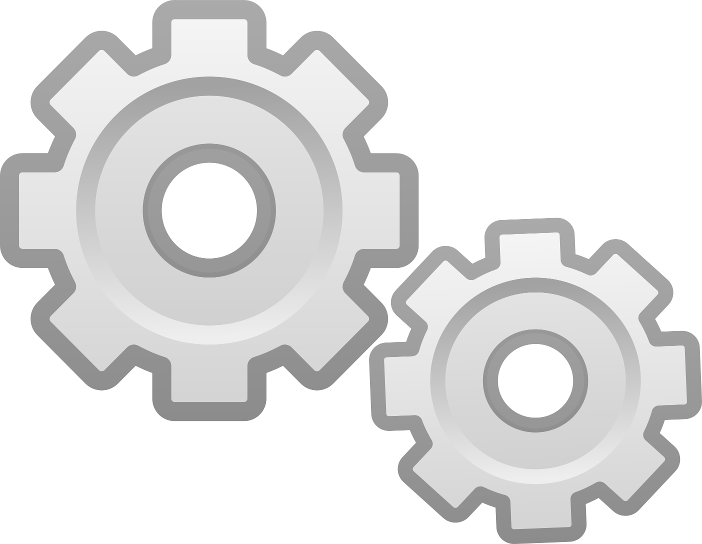

In [53]:
Image(filename="gears.png")

## Solution

Using **R2** and the **RMSE** search for a convergence of both errors:

In [54]:
def eval_model(param):
    alpha = param[0]
    degree = int(param[1])
    #create x^n terms
    x_ = PolynomialFeatures(degree=degree, include_bias=False).fit_transform(xtrain.reshape(-1, 1))
    #create and run ridge model
    model = Ridge(alpha=alpha, fit_intercept=True,solver='svd')
    model.fit(x_, ytrain)
    x__ = PolynomialFeatures(degree=degree, include_bias=False).fit_transform(xtest.reshape(-1, 1))   
    #train data
    y_pred = model.predict(x_)
    rmse = np.sqrt(mean_squared_error(ytrain, y_pred))        
    score = model.score(x_, ytrain)
    # test data
    y_pred = model.predict(x__)
    score_test = model.score(x__, ytest)
    rmse_test = np.sqrt(mean_squared_error(ytest, y_pred))        
    return rmse, score, rmse_test, score_test

In [55]:
maxdeg = 8
RMSE = list()
R2 = list()
for d in range(1,maxdeg):
    rmse, score, rmse_test, score_test = eval_model((shrink,d+1))
    RMSE.append((d+1, rmse, rmse_test))
    R2.append((d+1, score, score_test))
R2 = np.asarray(R2)
RMSE = np.asarray(RMSE)

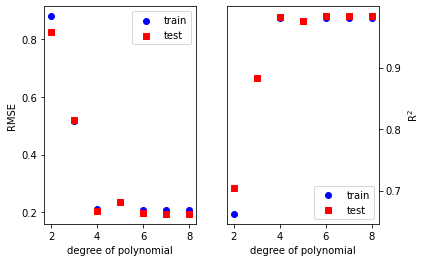

In [56]:
plt.subplot(121)
plt.scatter(RMSE[:,0],RMSE[:,1],marker="o",color='b',label="train")
plt.scatter(RMSE[:,0],RMSE[:,2],marker="s",color='r',label="test")
plt.xlabel("degree of polynomial")
plt.ylabel("RMSE")
plt.legend()
plt.locator_params(nbins=6)
ax = plt.subplot(122)
plt.scatter(R2[:,0],R2[:,1],marker="o",color='b',label="train")
plt.scatter(R2[:,0],R2[:,2],marker="s",color='r',label="test")
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
plt.locator_params(nbins=6)
plt.xlabel("degree of polynomial")
plt.ylabel("R$^2$")
plt.legend()
plt.savefig("learn.png",dpi=300)

### See the results

In [57]:
x_ = PolynomialFeatures(degree=6, include_bias=False).fit_transform(xtrain.reshape(-1, 1))
x__ = PolynomialFeatures(degree=6, include_bias=False).fit_transform(xtest.reshape(-1, 1))
model = Ridge(alpha=shrink, fit_intercept=True,solver='svd')
model.fit(x_, ytrain)

Ridge(alpha=0.1, solver='svd')

In [58]:
y_1 = model.predict(x_)
y_2 = model.predict(x__)

Text(0, 0.5, 'Energy (kJ/mol)')

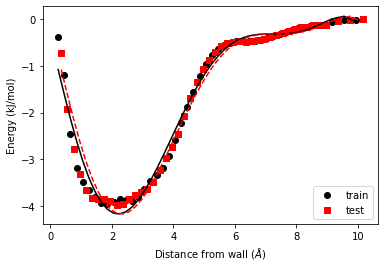

In [59]:
plt.scatter(xtrain,ytrain,marker="o",color='k',label='train')
plt.plot(xtrain,y_1,linestyle="-",color='k')
plt.scatter(xtest,ytest,marker="s",color='r',label='test')
plt.plot(xtest,y_1,linestyle="--",color='r')
plt.legend()
plt.xlabel("Distance from wall ($\AA$)")
plt.ylabel("Energy (kJ/mol)")

# The End!